In [1]:
#Import libraries

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df
                 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
print(df[['type', 'listed_in']])

         type                                          listed_in
0       Movie                 Children & Family Movies, Comedies
1       Movie                                    Stand-Up Comedy
2     TV Show                                           Kids' TV
3     TV Show                                           Kids' TV
4       Movie                                           Comedies
...       ...                                                ...
6229  TV Show  TV Action & Adventure, TV Comedies, TV Sci-Fi ...
6230  TV Show                                        TV Comedies
6231    Movie                                             Movies
6232  TV Show           British TV Shows, TV Comedies, TV Dramas
6233  TV Show                     Classic & Cult TV, TV Comedies

[6234 rows x 2 columns]


,show_id,release_year
show_id,1.000000,0.566577
release_year,0.566577,1.000000


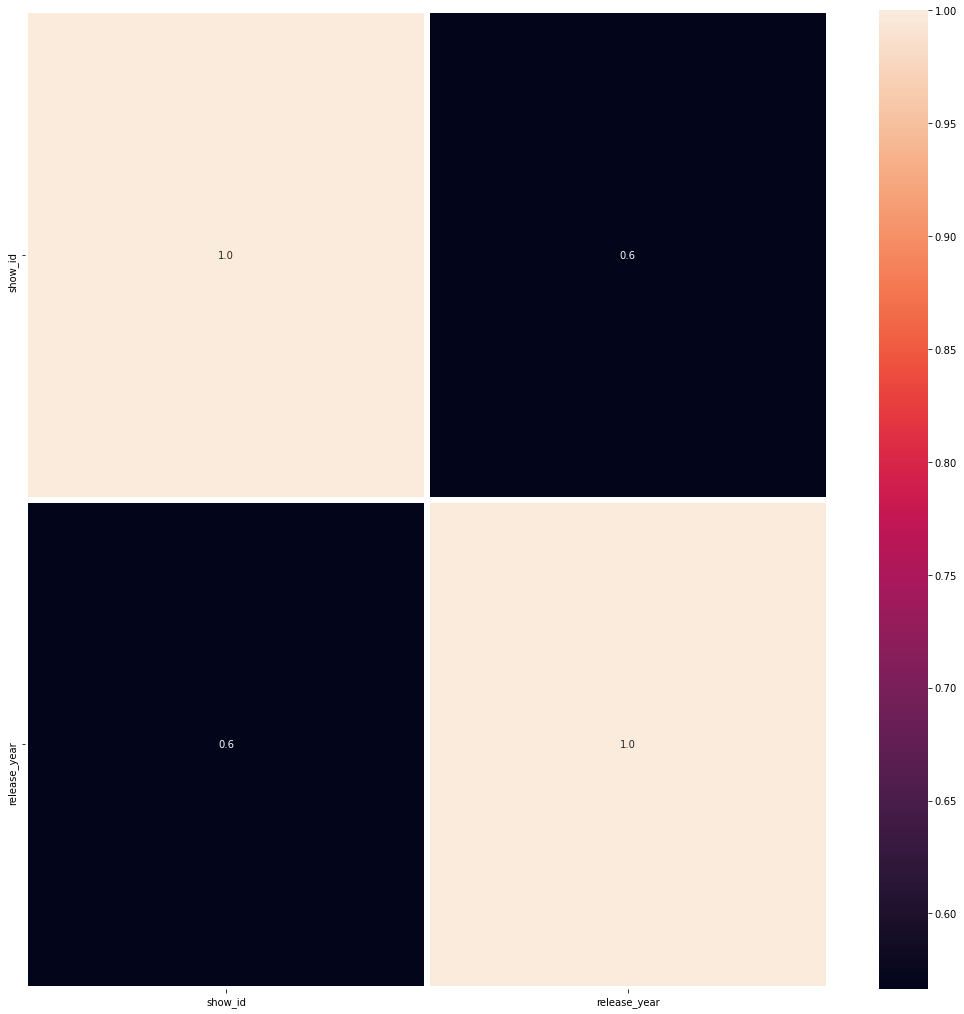

In [6]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths = 5, fmt='.1f', ax=ax)
df.corr()

In [7]:
#Unique types of productions
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [8]:
#Set Movie types in "Movie"
Movie = df[df.type == 'Movie']
Movie.count()

show_id         4265
type            4265
title           4265
director        4137
cast            3905
country         4070
date_added      4264
release_year    4265
rating          4257
duration        4265
listed_in       4265
description     4265
dtype: int64

In [9]:
#Set TV Show types in "Series"
Series = df[df.type == 'TV Show']
Series.count()


show_id         1969
type            1969
title           1969
director         128
cast            1759
country         1688
date_added      1959
release_year    1969
rating          1967
duration        1969
listed_in       1969
description     1969
dtype: int64

# ****🪐 What kind of unique TV Shows are there?****

In [10]:
Series.listed_in.unique()

array(["Kids' TV",
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'Docuseries, Science & Nature TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Docuseries', "Kids' TV, TV Comedies",
       'International TV Shows, TV Dramas, TV Thrillers',
       'Romantic TV Shows, TV Comedies, TV Dramas',
       'Crime TV Shows, TV Dramas, TV Mysteries', 'TV Comedies',
       'British TV Shows, Docuseries, International TV Shows',
       'International TV Shows, Romantic TV Shows, TV Dramas',
       'International TV Shows, TV Comedies, TV Dramas',
       'International TV Shows, TV Dramas',
       'International TV Shows, Reality TV, Spanish-Language TV Shows',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'TV Comedies, TV Dramas, Teen TV Shows', 'TV Comedies, TV Dramas',
       'International TV Shows, Korean TV Shows, TV Action & Adventure',
    

🪐  Year dataframe has been created from release_year column  in df dataframe.

In [11]:
year = pd.DataFrame(df["release_year"])
year

,release_year
0,2019
1,2016
2,2013
3,2016
4,2017
...,...
6229,2015
6230,2016
6231,2016
6232,2013


 #  🪐 Let's see the density of productions by release years

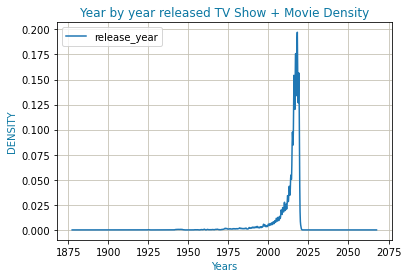

In [12]:
year.plot.kde(bw_method=0.04)
plt.grid(True,color="#c3c0b2")
plt.title("Year by year released TV Show + Movie Density", color="#0b77a2")
plt.xlabel("Years", color="#0b77a2")
plt.ylabel("DENSITY",color="#0b77a2")
plt.show()

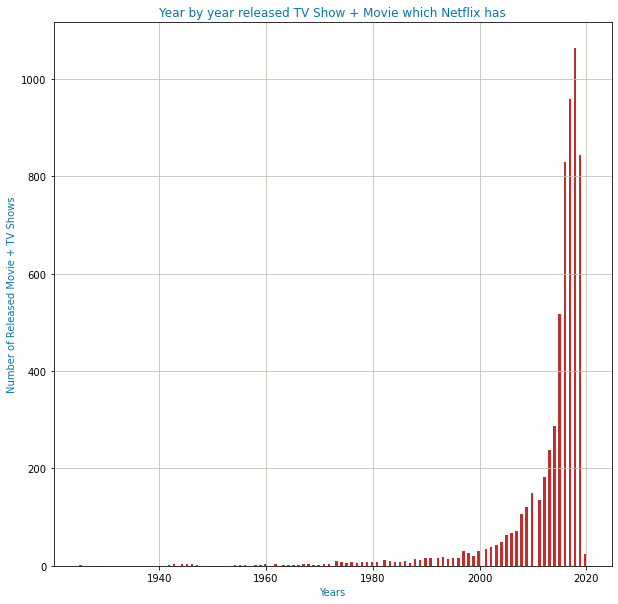

In [13]:
#Year by year released TV Show + Movie which Netflix has
df.release_year.plot(kind="hist", bins=200, figsize=(10,10), color="#c52c2c")
plt.grid(True,color="#c3c0b2")
plt.title("Year by year released TV Show + Movie which Netflix has", color="#0b77a2")
plt.xlabel("Years", color="#0b77a2")
plt.ylabel("Number of Released Movie + TV Shows",color="#0b77a2")
plt.show()

# *As we see, Netflix has more productions that released in 2019. And they are increasing the number of productions which new released.*

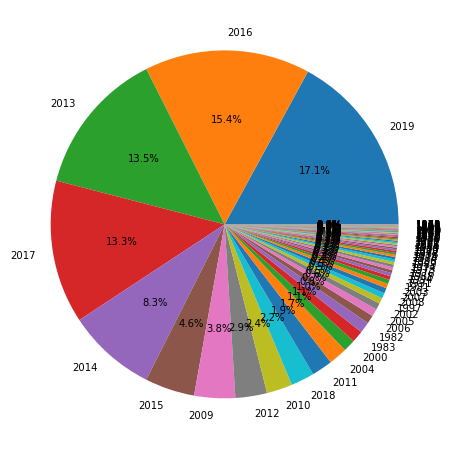

In [14]:
plt.figure(figsize=(8,8))
labels = df["release_year"].unique()
values = df["release_year"].value_counts()

plt.pie(values, labels=labels,autopct="%.1f%%")

plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


##   🪐 Is there a correlation between release year and show ids?

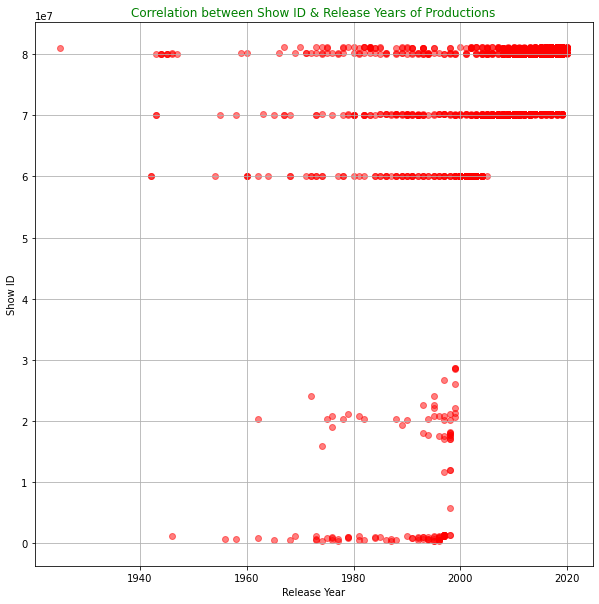

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(df.release_year,df.show_id,  color='red', alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('Show ID')
plt.title('Correlation between Show ID & Release Years of Productions', color="green")
plt.grid(True)
plt.show()

### ⭐️ We see that, Netflix gave 7xx and 8xx show ids for its after 2005 released productions.

## 🪐 Countries and Netflix Productions

In [17]:
#df.country.unique() --too long

In [18]:
#How many production released in countries
df.country.value_counts()

United States                              2032
India                                       777
United Kingdom                              348
Japan                                       176
Canada                                      141
                                           ... 
Croatia, Slovenia, Serbia, Montenegro         1
Mexico, Finland                               1
China, United States, Australia               1
Portugal, France, Poland, United States       1
United States, Denmark                        1
Name: country, Length: 554, dtype: int64

In [19]:
#Determine frequencies of productions country by country
US = df[df.country == 'United States']
us = US.show_id.count()
UK = df[df.country == 'United Kingdom']
uk = UK.show_id.count()
CAN = df[df.country == 'Canada']
can = CAN.show_id.count()
SPA = df[df.country == 'Spain']
spa = SPA.show_id.count()
GER = df[df.country == 'Germany']
ger = GER.show_id.count()
IND = df[df.country == 'India']
ind = IND.show_id.count()
CHI = df[df.country == 'China']
chi = CHI.show_id.count()

#Create dictionary
#dict = {'United States':us,'United Kingdom':uk,'India':ind,'Canada':can,'Spain':spa,'Germany':ger,'China':chi  }
dict = {"country":['United States','United Kingdom','India','Canada','Spain','Germany','China'], "frq":[us,uk,ind,can,spa,ger,chi]}

In [20]:
#Create dataframe from dictionary
FRQ = pd.DataFrame({"country":['United States','United Kingdom','India','Canada','Spain','Germany','China'], "frq":[us,uk,ind,can,spa,ger,chi]})
FRQ

,country,frq
0,United States,2032
1,United Kingdom,348
2,India,777
3,Canada,141
4,Spain,117
5,Germany,40
6,China,50


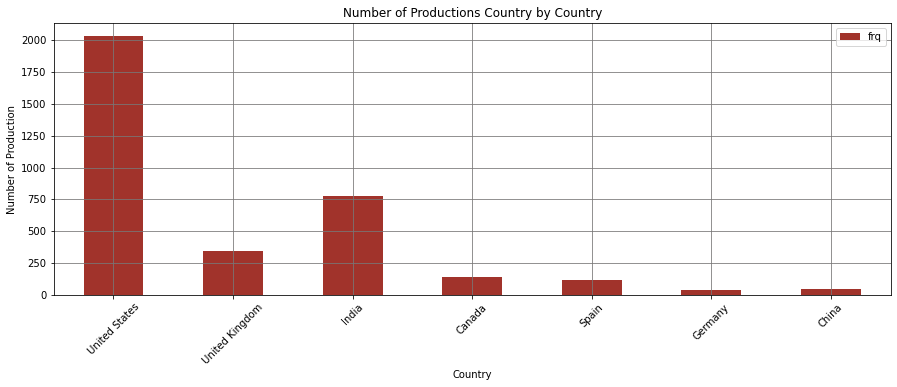

In [21]:
#Visualize the frequencies with histogram

FRQ.plot.bar(x="country", y="frq", rot=45,color="#a1332b",figsize=(15,5))
plt.xlabel("Country")
plt.ylabel("Number of Production")
plt.title("Number of Productions Country by Country")
plt.grid(True, color="#787777")
plt.show()

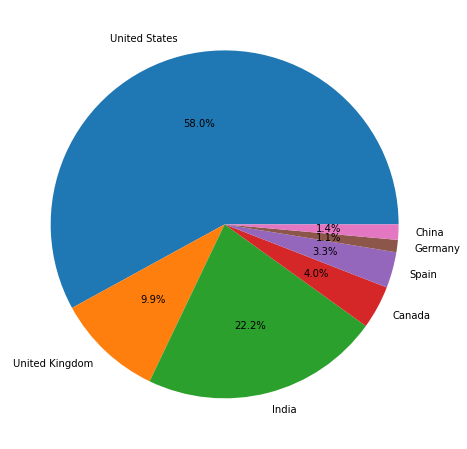

In [22]:
#Visualize the frequencies with pie
plt.figure(figsize=(8,8))

labels = FRQ.country
values = FRQ.frq

plt.pie(values, labels=labels,autopct="%.1f%%")

plt.show()